In [1]:
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
import folium
from folium.plugins import MarkerCluster

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv("/content/Coverage.csv",header=0, delimiter=",")
df.head()

,Index,Upazila_or_Thana,District,Area_Zip_Code,Latitude,Longitude,Operator,Active_Network_Available,Network_Level,Satisfaction_Score,Real_Time_Experience
0,0,Kawkhali,Pirojpur,8510,22.626128,90.059278,GP,4G,Low,3,4.0
1,1,Mathbaria,Pirojpur,8560,22.287592,89.959272,GP,4G,Low,3,4.0
2,2,Nazirpur,Pirojpur,8540,22.729367,89.960880,GP,4G,Low,3,5.0
3,3,Nesarabad,Pirojpur,8522,22.747200,90.103600,GP,4G,Moderate,6,6.0
4,4,Pirojpur Sadar,Pirojpur,8500,22.577800,89.990000,GP,4G,Good,10,7.5


In [5]:
df.dtypes

Index                         int64
Upazila_or_Thana             object
District                     object
Area_Zip_Code                 int64
Latitude                    float64
Longitude                   float64
Operator                     object
Active_Network_Available     object
Network_Level                object
Satisfaction_Score            int64
Real_Time_Experience        float64
dtype: object

In [6]:
#summarize the data
df.describe()

,Index,Area_Zip_Code,Latitude,Longitude,Satisfaction_Score,Real_Time_Experience
count,22360.000000,22360.000000,22360.000000,22360.000000,22360.000000,22360.000000
mean,11179.500000,4845.373882,23.971979,90.257898,3.811986,3.882335
std,6454.920345,2473.002508,2.985844,1.043455,2.835057,2.491611
min,0.000000,1000.000000,20.866700,88.141700,0.000000,0.000000
25%,5589.750000,2470.000000,22.975000,89.433300,3.000000,2.000000
50%,11179.500000,4590.000000,23.790000,90.318100,3.000000,3.500000
75%,16769.250000,6740.000000,24.683300,90.979200,6.000000,5.500000
max,22359.000000,9460.000000,89.650000,92.427800,10.000000,10.000000


In [7]:
df.isnull().sum()

Index                       0
Upazila_or_Thana            0
District                    0
Area_Zip_Code               0
Latitude                    0
Longitude                   0
Operator                    0
Active_Network_Available    0
Network_Level               0
Satisfaction_Score          0
Real_Time_Experience        0
dtype: int64

In [8]:
df.columns

Index(['Index', 'Upazila_or_Thana', 'District', 'Area_Zip_Code', 'Latitude',
       'Longitude', 'Operator', 'Active_Network_Available', 'Network_Level',
       'Satisfaction_Score', 'Real_Time_Experience'],
      dtype='object')

In [9]:
df.nunique()

Index                       22360
Upazila_or_Thana              543
District                       64
Area_Zip_Code                 522
Latitude                      475
Longitude                     466
Operator                        4
Active_Network_Available        2
Network_Level                   5
Satisfaction_Score              5
Real_Time_Experience           21
dtype: int64

In [10]:
df.duplicated().sum()

0

In [11]:
df.shape

(22360, 11)

In [12]:
import seaborn as sns

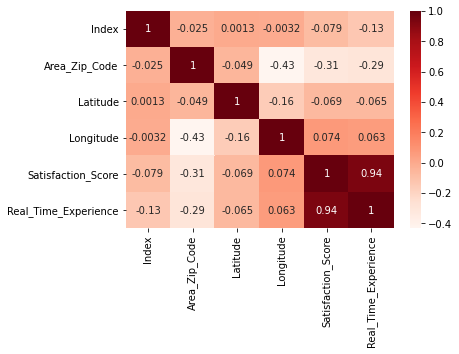

In [13]:
corr = df.corr()
sns.heatmap(corr,annot=True,cmap='Reds')

In [14]:
from matplotlib import pyplot as plt

In [15]:
df['Satisfaction_Score'].value_counts()

3     11734
6      3113
1      2956
10     2840
0      1717
Name: Satisfaction_Score, dtype: int64

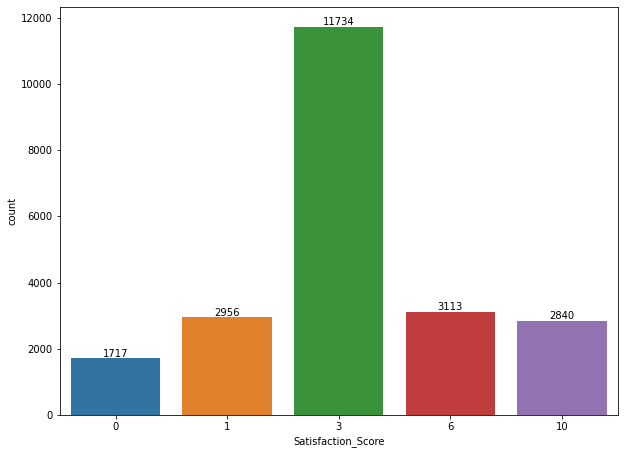

In [16]:
fig = plt.figure(figsize=(10 , 7.5))
ax = sns.countplot(x = 'Satisfaction_Score', data = df)
for p in ax.patches:
        ax.annotate(p.get_height(), (p.get_x()+p.get_width()/2, p.get_height()+45), ha="center", rotation = 0)

In [17]:
df['Real_Time_Experience'].value_counts()

3.0     2218
2.0     1938
2.5     1931
3.5     1809
4.0     1761
0.0     1531
1.5     1448
4.5     1383
5.5     1081
5.0     1041
6.0      822
1.0      774
8.0      696
6.5      641
7.5      593
0.5      557
7.0      547
8.5      503
9.0      416
9.5      370
10.0     300
Name: Real_Time_Experience, dtype: int64

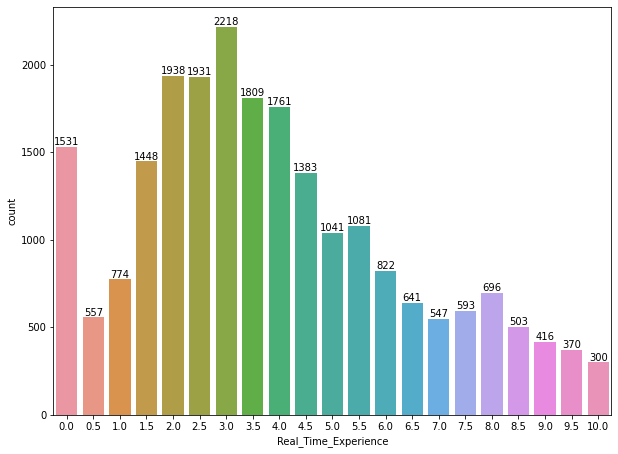

In [18]:
fig = plt.figure(figsize=(10 , 7.5))
ax = sns.countplot(x = 'Real_Time_Experience', data = df)
for p in ax.patches:
        ax.annotate(p.get_height(), (p.get_x()+p.get_width()/2, p.get_height()+10), ha="center")

In [ ]:
#sns.pairplot(df, hue = 'Active_Network_Available')

In [ ]:
#sns.pairplot(df, hue = 'Network_Level')

In [ ]:
#sns.pairplot(df, hue = 'Satisfaction_Score')

In [ ]:
#sns.pairplot(df, hue = 'Real_Time_Experience')

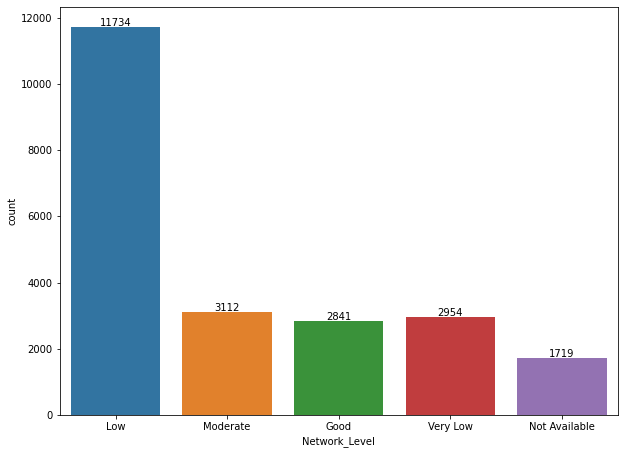

In [19]:
fig = plt.figure(figsize=(10 , 7.5))
ax = sns.countplot(x = 'Network_Level', data = df)
for p in ax.patches:
        ax.annotate(p.get_height(), (p.get_x()+p.get_width()/2, p.get_height()+20), ha="center")

# **Checking Network Availability**

**Select your Available Active Network :**  4G or 3G/2G

**Select your Network Level :** Very Low, Low, Moderate, Good, Not Available

In [20]:
network_level_df = df[(df['Network_Level'] == input('Network Level : '))]
print(f'Matched Result : {network_level_df.shape[0]}')
network_level_df.head()

Network Level : Good
Matched Result : 2841


,Index,Upazila_or_Thana,District,Area_Zip_Code,Latitude,Longitude,Operator,Active_Network_Available,Network_Level,Satisfaction_Score,Real_Time_Experience
4,4,Pirojpur Sadar,Pirojpur,8500,22.5778,89.9900,GP,4G,Good,10,7.5
7,7,Ashuganj,Brahmanbaria,3402,24.0366,91.0050,GP,4G,Good,10,8.0
8,8,Brahmanbaria Sadar,Brahmanbaria,3400,23.9528,91.1167,GP,4G,Good,10,9.0
22,22,Chandpur Sadar,Chandpur,3600,23.2139,90.6361,GP,4G,Good,10,8.5
45,45,Cox's Bazar Sadar,Cox'S Bazar,4700,21.4500,91.9833,GP,4G,Good,10,9.0


Network Level: Good


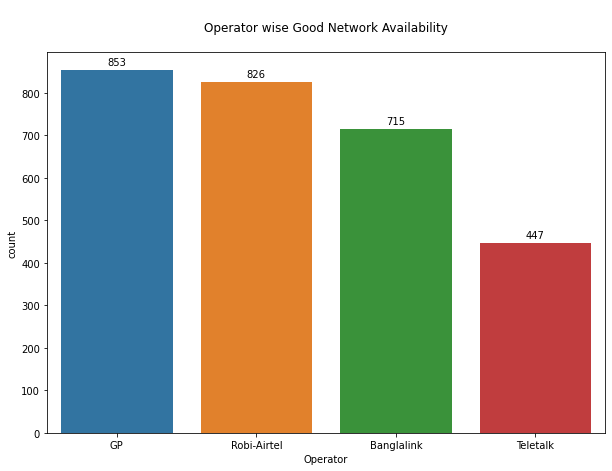

In [21]:
network_level = network_level_df['Network_Level'].unique()
network_level[0]
fig = plt.figure(figsize=(10 , 7))
plt.title(f'\nOperator wise {network_level[0]} Network Availability\n')
ax = sns.countplot(x = 'Operator', data = network_level_df)
print(f"Network Level: {network_level[0]}")
for p in ax.patches:
        ax.annotate(p.get_height(), (p.get_x()+p.get_width()/2, p.get_height()+ 12), ha="center")

Network Level: Good


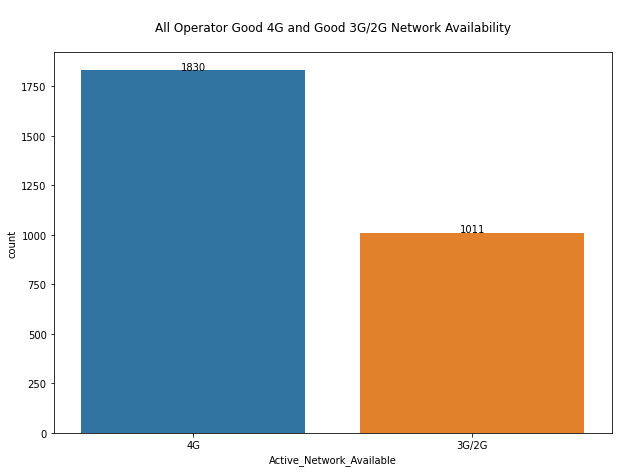

In [22]:
fig = plt.figure(figsize=(10 , 7))
plt.title(f'\nAll Operator {network_level[0]} 4G and {network_level[0]} 3G/2G Network Availability\n')
ax = sns.countplot(x = 'Active_Network_Available', data = network_level_df)
print(f"Network Level: {network_level[0]}")
for p in ax.patches:
        ax.annotate(p.get_height(), (p.get_x()+p.get_width()/2, p.get_height()+ 2.5), ha="center")

# **Detailed Network Level Checking**

**Select your Network Level :** Very Low, Low, Moderate, Good, Not Available

**Select your Available Active Network :**  4G or 3G/2G

**Select your Operator :** GP, Robi-Airtel, Banglalink, Teletalk

In [23]:
with_operator_mentioned_network_level_detailed_df = df[(df['Operator'] == input('Operator : ')) & (df['Active_Network_Available'] == input('Active_Network_Available : ')) & (df['Network_Level'] == input('Network_Level : '))]
print(f'Matched Result : {with_operator_mentioned_network_level_detailed_df.shape[0]}')
with_operator_mentioned_network_level_detailed_df.head()

Operator : Banglalink
Active_Network_Available : 4G
Network_Level : Good
Matched Result : 455


,Index,Upazila_or_Thana,District,Area_Zip_Code,Latitude,Longitude,Operator,Active_Network_Available,Network_Level,Satisfaction_Score,Real_Time_Experience
1975,1975,Ashuganj,Brahmanbaria,3402,24.0366,91.0050,Banglalink,4G,Good,10,8.0
1976,1976,Brahmanbaria Sadar,Brahmanbaria,3400,23.9528,91.1167,Banglalink,4G,Good,10,8.5
1990,1990,Chandpur Sadar,Chandpur,3600,23.2139,90.6361,Banglalink,4G,Good,10,8.0
2025,2025,Cumilla Sadar,Cumilla,3500,23.4583,91.1833,Banglalink,4G,Good,10,9.0
2026,2026,Cumilla Sadar Daksin,Cumilla,3500,23.3667,91.2000,Banglalink,4G,Good,10,8.0


Operator : Banglalink
Active Network Level : Good
Available Network : 4G networks

Your query has matched 455 results


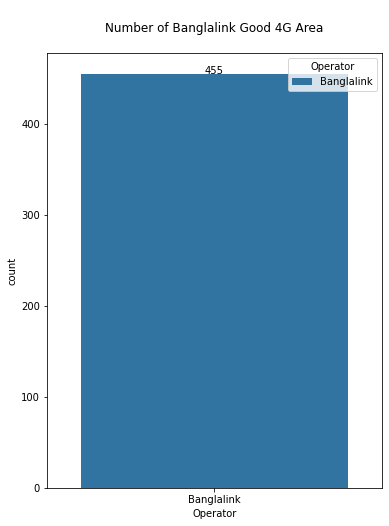

In [24]:
detailed_operator = with_operator_mentioned_network_level_detailed_df['Operator'].unique()
detailed_operator[0]

detailed_active_network_available = with_operator_mentioned_network_level_detailed_df['Active_Network_Available'].unique()
detailed_active_network_available[0]

detailed_active_network_level = with_operator_mentioned_network_level_detailed_df['Network_Level'].unique()
detailed_active_network_level[0]


fig = plt.figure(figsize=(6 , 8))
plt.title(f'\nNumber of {detailed_operator[0]} {detailed_active_network_level[0]} {detailed_active_network_available[0]} Area\n')
ax = sns.countplot(x = 'Operator', data = with_operator_mentioned_network_level_detailed_df,hue = 'Operator' )
print(f"Operator : {detailed_operator[0]}\nActive Network Level : {detailed_active_network_level[0]}\nAvailable Network : {detailed_active_network_available[0]} networks")
for p in ax.patches:
        ax.annotate(p.get_height(), (p.get_x()+p.get_width()/2, p.get_height()+0.1), ha="center")
print(f'\nYour query has matched {p.get_height()} results')

# **District Area Network Strength**

**Select your network level :** Very Low, Low, Moderate, Good, Not Available

**Select your available active network available :** 4G or 3G/2G

**Select your operator :** GP, Robi-Airtel, Banglalink, Teletalk

In [25]:
district_all_network_df = df[(df['District'] == input('District : ')) & (df['Operator'] == input('Operator : ')) & (df['Active_Network_Available'] == input('Active_Network_Available : '))]
print(f'Matched Result : {district_all_network_df.shape[0]}')
district_all_network_df

District : Barishal
Operator : GP
Active_Network_Available : 4G
Matched Result : 50


,Index,Upazila_or_Thana,District,Area_Zip_Code,Latitude,Longitude,Operator,Active_Network_Available,Network_Level,Satisfaction_Score,Real_Time_Experience
77,77,Agailjhara,Barishal,8240,22.9667,90.1500,GP,4G,Moderate,6,5.5
78,78,Babuganj,Barishal,8210,22.8319,90.3222,GP,4G,Low,3,5.0
79,79,Bakerganj,Barishal,8280,22.5500,90.3389,GP,4G,Low,3,4.0
80,80,Banaripara,Barishal,8530,22.7819,90.1667,GP,4G,Low,3,3.0
81,81,Barishal Sadar,Barishal,8200,22.7000,90.3667,GP,4G,Good,10,8.5
82,82,Hizla,Barishal,8260,22.9000,90.5083,GP,4G,Low,3,4.5
83,83,Mehendiganj,Barishal,8270,22.8319,90.5333,GP,4G,Low,3,4.5
84,84,Muladi,Barishal,8250,22.9150,90.4150,GP,4G,Moderate,6,6.0
85,85,Uzirpur,Barishal,8220,22.8111,90.2444,GP,4G,Moderate,6,7.0
491,491,Gournadi,Barishal,8230,22.9736,90.2306,GP,4G,Low,3,4.5


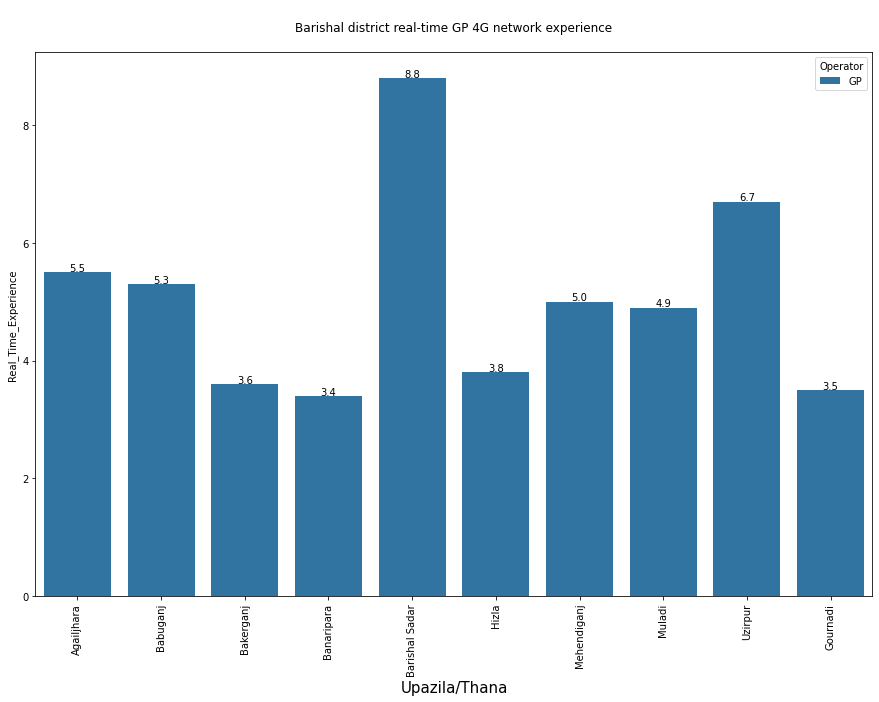

In [26]:
selected_district = district_all_network_df['District'].unique()
selected_district[0]

selected_operator = district_all_network_df['Operator'].unique()
selected_operator[0]

selected_active_network = district_all_network_df['Active_Network_Available'].unique()
selected_active_network[0]


plt.figure(figsize=(15,10))
plt.title(f'\n{selected_district[0]} district real-time {selected_operator[0]} {selected_active_network[0]} network experience\n')
ax = sns.barplot(x = 'Upazila_or_Thana',y= 'Real_Time_Experience', data= district_all_network_df, hue='Operator',order = district_all_network_df['Upazila_or_Thana'].unique(), ci = None)
plt.xlabel('Upazila/Thana',fontsize=15)
#print(f"Area : {area[0]}\nAll Operator Network : {network[0]} networks")
for p in ax.patches:
        ax.annotate(p.get_height().round(1), (p.get_x()+p.get_width()/2, p.get_height()+0.02), ha="center", rotation = 0)
        plt.xticks(rotation= 90)
plt.show()

# **Upazila wise your network strength**

**Select your network level :** Very Low, Low, Moderate, Good, Not Available

**Select your available active network available :** 4G or 3G/2G

**Select your operator :** GP, Robi-Airtel, Banglalink, Teletalk

In [27]:
#area_all_network_df = df[(df['Upazila_or_Thana'] == input('Upazila/Thana : ')) & (df['Active_Network_Available'].str.contains(input('Active_Network_Available : ')))]
area_all_network_df = df[(df['Upazila_or_Thana'] == input('Upazila/Thana : ')) & (df['Active_Network_Available'] == input('Active_Network_Available : '))]
area_all_network_df 

Upazila/Thana : Barishal Sadar
Active_Network_Available : 3G/2G


,Index,Upazila_or_Thana,District,Area_Zip_Code,Latitude,Longitude,Operator,Active_Network_Available,Network_Level,Satisfaction_Score,Real_Time_Experience
573,573,Barishal Sadar,Barishal,8200,22.7,90.3667,GP,3G/2G,Good,10,8.0
1557,1557,Barishal Sadar,Barishal,8200,22.7,90.3667,Robi-Airtel,3G/2G,Moderate,6,6.0
2541,2541,Barishal Sadar,Barishal,8200,22.7,90.3667,Banglalink,3G/2G,Moderate,6,5.5
3525,3525,Barishal Sadar,Barishal,8200,22.7,90.3667,Teletalk,3G/2G,Moderate,6,6.5
5045,5045,Barishal Sadar,Barishal,8200,22.7,90.3667,GP,3G/2G,Good,10,8.0
6029,6029,Barishal Sadar,Barishal,8200,22.7,90.3667,Robi-Airtel,3G/2G,Moderate,6,6.0
7013,7013,Barishal Sadar,Barishal,8200,22.7,90.3667,Banglalink,3G/2G,Low,3,5.0
7997,7997,Barishal Sadar,Barishal,8200,22.7,90.3667,Teletalk,3G/2G,Moderate,6,6.0
10993,10993,Barishal Sadar,Barishal,8200,22.7,90.3667,GP,3G/2G,Good,10,8.0
11485,11485,Barishal Sadar,Barishal,8200,22.7,90.3667,Robi-Airtel,3G/2G,Moderate,6,5.5


**Adding a new point column**

In [28]:
Point = area_all_network_df['Satisfaction_Score'] * (10/3) + area_all_network_df['Real_Time_Experience'] * (20/3)
area_all_network_df['Point'] = round(Point,2)
area_all_network_df

,Index,Upazila_or_Thana,District,Area_Zip_Code,Latitude,Longitude,Operator,Active_Network_Available,Network_Level,Satisfaction_Score,Real_Time_Experience,Point
573,573,Barishal Sadar,Barishal,8200,22.7,90.3667,GP,3G/2G,Good,10,8.0,86.67
1557,1557,Barishal Sadar,Barishal,8200,22.7,90.3667,Robi-Airtel,3G/2G,Moderate,6,6.0,60.00
2541,2541,Barishal Sadar,Barishal,8200,22.7,90.3667,Banglalink,3G/2G,Moderate,6,5.5,56.67
3525,3525,Barishal Sadar,Barishal,8200,22.7,90.3667,Teletalk,3G/2G,Moderate,6,6.5,63.33
5045,5045,Barishal Sadar,Barishal,8200,22.7,90.3667,GP,3G/2G,Good,10,8.0,86.67
6029,6029,Barishal Sadar,Barishal,8200,22.7,90.3667,Robi-Airtel,3G/2G,Moderate,6,6.0,60.00
7013,7013,Barishal Sadar,Barishal,8200,22.7,90.3667,Banglalink,3G/2G,Low,3,5.0,43.33
7997,7997,Barishal Sadar,Barishal,8200,22.7,90.3667,Teletalk,3G/2G,Moderate,6,6.0,60.00
10993,10993,Barishal Sadar,Barishal,8200,22.7,90.3667,GP,3G/2G,Good,10,8.0,86.67
11485,11485,Barishal Sadar,Barishal,8200,22.7,90.3667,Robi-Airtel,3G/2G,Moderate,6,5.5,56.67



Upazila/Thana : Barishal Sadar
All Operator Network : 3G/2G networks
Upazila/Thana : Barishal Sadar Best Coverage Network is : GP.


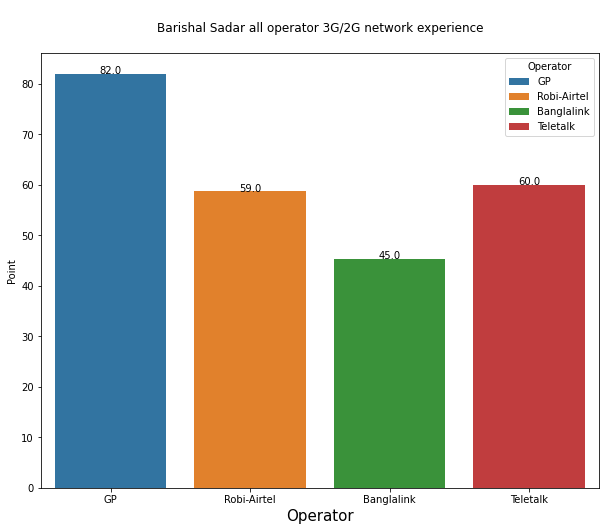

In [29]:
area = area_all_network_df['Upazila_or_Thana'].unique()
area[0]

network = area_all_network_df['Active_Network_Available'].unique()
network[0]

max_score = area_all_network_df[['Point']].max().unique()
max_score[0]


max_area_all_network_df = area_all_network_df[(area_all_network_df['Point'] == max_score[0])]
max_area_all_network_df

max_network = max_area_all_network_df['Operator'].unique()
max_network[0]


plt.figure(figsize=(10,8))
plt.title(f'\n{area[0]} all operator {network[0]} network experience\n')
ax = sns.barplot(x = 'Operator',y= 'Point', data= area_all_network_df, hue='Operator',order = area_all_network_df['Operator'].unique(), dodge = False, ci = None)
plt.xlabel('Operator',fontsize=15)
print(f"\nUpazila/Thana : {area[0]}\nAll Operator Network : {network[0]} networks")
print(f"Upazila/Thana : {area[0]} Best Coverage Network is : {max_network[0]}.")
for p in ax.patches:
        ax.annotate(p.get_height().round(), (p.get_x()+p.get_width()/2, p.get_height()+0.02), ha="center")
plt.show()

# **Plotting Location in Map**

In [30]:
bd_lat = 23.6850
bd_long = 90.3563
bd_map = folium.Map(location=[bd_lat, bd_long], zoom_start=8)

for Latitude, Longitude, label in zip(area_all_network_df.Latitude, area_all_network_df.Longitude, area_all_network_df.Point):
    folium.CircleMarker(
        [Latitude, Longitude],
        radius=np.log(label*100),  #define how big you want the circle markers to be
        color='black',
        fill=True,
        #popup=str(label),
        popup = str(area[0]),
        fill_color='red',
        fill_opacity=0.8
    ).add_to(bd_map)

#show map
bd_map

# **Implementation of CatBoost**

In [31]:
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt

In [32]:
import warnings
warnings.filterwarnings('ignore')

In [33]:
df = pd.read_csv("/content/Coverage.csv",header=0, delimiter=",")
df.head(2)

,Index,Upazila_or_Thana,District,Area_Zip_Code,Latitude,Longitude,Operator,Active_Network_Available,Network_Level,Satisfaction_Score,Real_Time_Experience
0,0,Kawkhali,Pirojpur,8510,22.626128,90.059278,GP,4G,Low,3,4.0
1,1,Mathbaria,Pirojpur,8560,22.287592,89.959272,GP,4G,Low,3,4.0


In [34]:
df = df.drop(['Longitude', 'Latitude', 'Index'], axis=1)
df.head(2)

,Upazila_or_Thana,District,Area_Zip_Code,Operator,Active_Network_Available,Network_Level,Satisfaction_Score,Real_Time_Experience
0,Kawkhali,Pirojpur,8510,GP,4G,Low,3,4.0
1,Mathbaria,Pirojpur,8560,GP,4G,Low,3,4.0


In [35]:
Point = df['Satisfaction_Score'] * (10/3) + df['Real_Time_Experience'] * (20/3)
df['Point'] = round(Point,2)
df['Point'] = df['Point'].astype(int)
#df['Real_Time_Experience'] = df['Real_Time_Experience'].astype(int)
df.head()

,Upazila_or_Thana,District,Area_Zip_Code,Operator,Active_Network_Available,Network_Level,Satisfaction_Score,Real_Time_Experience,Point
0,Kawkhali,Pirojpur,8510,GP,4G,Low,3,4.0,36
1,Mathbaria,Pirojpur,8560,GP,4G,Low,3,4.0,36
2,Nazirpur,Pirojpur,8540,GP,4G,Low,3,5.0,43
3,Nesarabad,Pirojpur,8522,GP,4G,Moderate,6,6.0,60
4,Pirojpur Sadar,Pirojpur,8500,GP,4G,Good,10,7.5,83


In [36]:
#Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings(action='ignore')

In [37]:
df.dtypes

Upazila_or_Thana             object
District                     object
Area_Zip_Code                 int64
Operator                     object
Active_Network_Available     object
Network_Level                object
Satisfaction_Score            int64
Real_Time_Experience        float64
Point                         int64
dtype: object

In [38]:
for col in ['Upazila_or_Thana','Operator', 'Active_Network_Available', 'District', 'Network_Level', 'Area_Zip_Code']:
    df[col] = df[col].astype('category')

In [39]:
df.dtypes

Upazila_or_Thana            category
District                    category
Area_Zip_Code               category
Operator                    category
Active_Network_Available    category
Network_Level               category
Satisfaction_Score             int64
Real_Time_Experience         float64
Point                          int64
dtype: object

In [40]:
train, test = train_test_split(df, test_size=0.2, random_state=42, shuffle=True)

In [41]:
train.shape, test.shape

((17888, 9), (4472, 9))

In [42]:
!pip install catboost

In [43]:
import catboost as cat
cat_feat = ['Upazila_or_Thana','Operator', 'Active_Network_Available', 'District' , 'Area_Zip_Code']
#features = list(set(train.columns)-set(['Point']))
features = ['Operator','Upazila_or_Thana', 'Active_Network_Available', 'District', 'Area_Zip_Code']
target = 'Point'
model = cat.CatBoostRegressor(random_state= 3, cat_features=cat_feat, verbose= 0, learning_rate = 0.1, iterations= 335, l2_leaf_reg= 1, loss_function = 'RMSE', depth = 10)
#model.fit(train[features],train[target])

In [44]:
from catboost import CatBoostClassifier, CatBoostRegressor, Pool
pool = Pool(train[features], train[target], cat_features=cat_feat, feature_names=features)

In [45]:
params={'iterations': 335,'depth':6,'learning_rate':0.1,'eval_metric': 'RMSE', "loss_function": "RMSE"}

In [46]:
grid = {'learning_rate': [0.03, 0.1], 'depth': [4, 6, 10], 'l2_leaf_reg': [1, 3, 5, 7, 9]}

In [47]:
model.grid_search(grid,
            X=train[features],
            y=train[target],
            cv = 10,
            partition_random_seed= 0,
            calc_cv_statistics=True,
            search_by_train_test_split=True,
            refit=True,
            shuffle=True,
            stratified=None,
            train_size=0.8,
            verbose=True,
            plot= True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))


bestTest = 9.500708178
bestIteration = 334

0:	loss: 9.5007082	best: 9.5007082 (0)	total: 1.86s	remaining: 54s

bestTest = 8.971612287
bestIteration = 334

1:	loss: 8.9716123	best: 8.9716123 (1)	total: 3.66s	remaining: 51.3s

bestTest = 9.519552107
bestIteration = 334

2:	loss: 9.5195521	best: 8.9716123 (1)	total: 5.48s	remaining: 49.3s

bestTest = 8.98262436
bestIteration = 333

3:	loss: 8.9826244	best: 8.9716123 (1)	total: 7.24s	remaining: 47.1s

bestTest = 9.544851462
bestIteration = 334

4:	loss: 9.5448515	best: 8.9716123 (1)	total: 9.01s	remaining: 45s

bestTest = 8.999278472
bestIteration = 334

5:	loss: 8.9992785	best: 8.9716123 (1)	total: 10.7s	remaining: 42.9s

bestTest = 9.526686881
bestIteration = 334

6:	loss: 9.5266869	best: 8.9716123 (1)	total: 12.5s	remaining: 41s

bestTest = 8.957745567
bestIteration = 331

7:	loss: 8.9577456	best: 8.9577456 (7)	total: 14.3s	remaining: 39.2s

bestTest = 9.53352384
bestIteration = 334

8:	loss: 9.5335238	best: 8.9577456 (7)	total: 16s	r

{'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,
               43,
               44,
               45,
               46,
               47,
               48,
               49,
             

In [48]:
cv_res = cat.cv(params=params, 
             pool=pool,
             fold_count =10,
             inverted=False,
             partition_random_seed=0,
             shuffle=True)
print(cv_res)

0:	learn: 42.0574266	test: 42.0838137	best: 42.0838137 (0)
1:	learn: 38.4943936	test: 38.5347012	best: 38.5347012 (1)
2:	learn: 35.4347873	test: 35.4150122	best: 35.4150122 (2)
3:	learn: 32.6765667	test: 32.6391466	best: 32.6391466 (3)
4:	learn: 30.1856208	test: 30.1438478	best: 30.1438478 (4)
5:	learn: 28.0100044	test: 27.9814431	best: 27.9814431 (5)
6:	learn: 26.1398741	test: 26.0965411	best: 26.0965411 (6)
7:	learn: 24.4521802	test: 24.3948338	best: 24.3948338 (7)
8:	learn: 23.0138696	test: 22.9341630	best: 22.9341630 (8)
9:	learn: 21.7491955	test: 21.6649861	best: 21.6649861 (9)
10:	learn: 20.4367655	test: 20.2947413	best: 20.2947413 (10)
11:	learn: 19.1987262	test: 18.9957958	best: 18.9957958 (11)
12:	learn: 18.1196907	test: 17.8632698	best: 17.8632698 (12)
13:	learn: 17.1690096	test: 16.8427360	best: 16.8427360 (13)
14:	learn: 16.3585203	test: 15.9764698	best: 15.9764698 (14)
15:	learn: 15.6507432	test: 15.2062668	best: 15.2062668 (15)
16:	learn: 15.0339521	test: 14.5295441	best:

In [49]:
model.fit(train[features],train[target])

In [50]:
importances = model.get_feature_importance(prettified=True)
print(importances)

                 Feature Id  Importances
0                  District    25.316073
1                  Operator    23.889726
2             Area_Zip_Code    20.269989
3  Active_Network_Available    19.469304
4          Upazila_or_Thana    11.054909


In [51]:
model.get_params()

{'cat_features': ['Upazila_or_Thana',
  'Operator',
  'Active_Network_Available',
  'District',
  'Area_Zip_Code'],
 'depth': 10,
 'iterations': 335,
 'l2_leaf_reg': 1,
 'learning_rate': 0.1,
 'loss_function': 'RMSE',
 'random_state': 3,
 'verbose': 0}

In [52]:
shap_info = model.get_feature_importance(data=pool, type='ShapValues', verbose=10000)
shap_values = shap_info[:,:-1]
base_values = shap_info[:,-1]
print(shap_values.shape)

Processing trees...
128/335 trees processed	passed time: 22.3s	remaining time: 36.1s
335/335 trees processed	passed time: 1m 10s	remaining time: 0us
Processing documents...
128/17888 documents processed	passed time: 15.9ms	remaining time: 2.2s
10112/17888 documents processed	passed time: 1.1s	remaining time: 846ms
17888/17888 documents processed	passed time: 1.93s	remaining time: 0us
(17888, 5)


In [53]:
!pip install shap

     |████████████████████████████████| 356 kB 8.1 MB/s 
  Created wheel for shap: filename=shap-0.39.0-cp37-cp37m-linux_x86_64.whl size=491638 sha256=491f0b0876ac08a115c128605178337e24ce223c8174a459a6e61633291e16a8
  Stored in directory: /root/.cache/pip/wheels/ca/25/8f/6ae5df62c32651cd719e972e738a8aaa4a87414c4d2b14c9c0
Successfully built shap


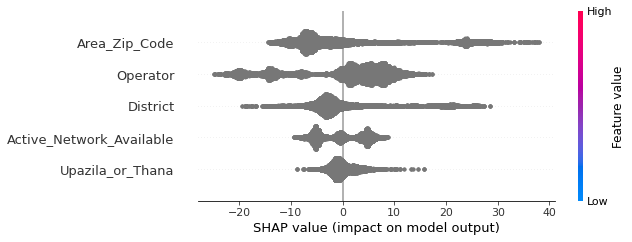

In [54]:
import shap
shap.summary_plot(shap_values, train[features])

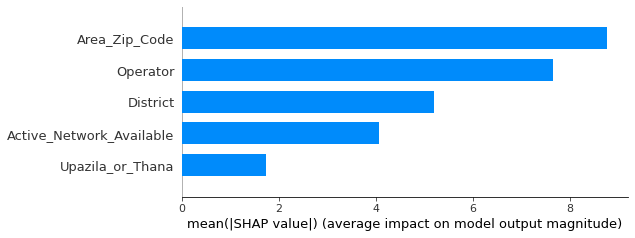

In [55]:
#feature importance plot
shap.summary_plot(shap_values, train[features], plot_type="bar")

In [56]:
from catboost import CatBoostClassifier, Pool

pool = Pool(train[features], train[target], cat_features=cat_feat, feature_names=features)
model.plot_tree(
    tree_idx=0,
    pool=pool
)

In [57]:
print(features)

['Operator', 'Upazila_or_Thana', 'Active_Network_Available', 'District', 'Area_Zip_Code']


In [58]:
y_true= pd.DataFrame(data=test[target], columns=['Point'])
test_temp = test.drop(columns=[target])

In [59]:
data=test[target]
data

5864     66
2458     33
8299      6
4978     63
6717     40
         ..
7676     30
2455     36
17512    10
10673     3
137       0
Name: Point, Length: 4472, dtype: int64

In [60]:
y_pred = model.predict(test_temp[features])

In [61]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse = sqrt(mean_squared_error(y_true, y_pred))
print(rmse)

7.715008133807238


In [62]:
import pickle
filename = 'catboost_model.pkl'

In [ ]:
pickle.dump(model, open(filename, 'wb'))

In [ ]:
#loaded_model = pickle.load(open(filename, 'rb'))

In [63]:
test_temp[features].head(10)

,Operator,Upazila_or_Thana,Active_Network_Available,District,Area_Zip_Code
5864,Robi-Airtel,Gobindaganj,4G,Gaibandha,5740
2458,Banglalink,Zakiganj,4G,Sylhet,3190
8299,Teletalk,Tanore,3G/2G,Rajshahi,6230
4978,GP,Sarail,3G/2G,Brahmanbaria,3430
6717,Banglalink,Sreepur,4G,Magura,7610
5549,Robi-Airtel,Jhalokathi Sadar,4G,Jhalokathi,8400
12845,Teletalk,Madhabpur,3G/2G,Habiganj,3330
4985,GP,Thanchi,3G/2G,Bandarban,4630
9459,Robi-Airtel,Faridganj,4G,Chandpur,3650
9536,Robi-Airtel,Galachipa,4G,Patuakhali,8640


In [64]:
model.predict(test_temp[features].head(10))

array([51.49977349, 31.03109158, 14.35792555, 51.17950057, 37.19285257,
       62.84139536, 16.72878552, 17.14289431, 54.35610846, 35.99120833])

In [65]:
model.predict(test_temp[['Operator', 'Upazila_or_Thana', 'Active_Network_Available', 'District' , 'Area_Zip_Code']].head(10))

array([51.49977349, 31.03109158, 14.35792555, 51.17950057, 37.19285257,
       62.84139536, 16.72878552, 17.14289431, 54.35610846, 35.99120833])

In [66]:
train_score = model.score(train[features],train[target])
train_score

0.9259343908450325

In [67]:
val_score = model.score(test[features],test[target])
val_score

0.9109158466679674

In [68]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
#k-fold CV using Sklearn
scores = cross_val_score(model, train[features],train[target], scoring ='r2', cv= 10)
scores 

array([0.91504674, 0.90954586, 0.91161494, 0.91503558, 0.899898  ,
       0.90731379, 0.90434601, 0.91297898, 0.91704709, 0.91964088])

In [69]:
a = pd.concat([test_temp[features],data], axis = 1)
a.head(5)

,Operator,Upazila_or_Thana,Active_Network_Available,District,Area_Zip_Code,Point
5864,Robi-Airtel,Gobindaganj,4G,Gaibandha,5740,66
2458,Banglalink,Zakiganj,4G,Sylhet,3190,33
8299,Teletalk,Tanore,3G/2G,Rajshahi,6230,6
4978,GP,Sarail,3G/2G,Brahmanbaria,3430,63
6717,Banglalink,Sreepur,4G,Magura,7610,40


# **Upazila/Thana wise Network Strength**

**Select your network level :** Very Low, Low, Moderate, Good, Not Available

**Select your available active network available :** 4G or 3G/2G

**Select your operator :** GP, Robi-Airtel, Banglalink, Teletalk

In [70]:
area_all_network_df = df[(df['Upazila_or_Thana'] == input('Upazila/Thana : ')) & (df['Active_Network_Available'] == input('Active_Network_Available : '))]
area_all_network_df 

Upazila/Thana : Barishal Sadar
Active_Network_Available : 4G


,Upazila_or_Thana,District,Area_Zip_Code,Operator,Active_Network_Available,Network_Level,Satisfaction_Score,Real_Time_Experience,Point
81,Barishal Sadar,Barishal,8200,GP,4G,Good,10,8.5,90
1065,Barishal Sadar,Barishal,8200,Robi-Airtel,4G,Good,10,8.5,90
2049,Barishal Sadar,Barishal,8200,Banglalink,4G,Good,10,8.0,86
3033,Barishal Sadar,Barishal,8200,Teletalk,4G,Moderate,6,5.5,56
4553,Barishal Sadar,Barishal,8200,GP,4G,Good,10,9.5,96
5537,Barishal Sadar,Barishal,8200,Robi-Airtel,4G,Good,10,8.5,90
6521,Barishal Sadar,Barishal,8200,Banglalink,4G,Good,10,8.0,86
7505,Barishal Sadar,Barishal,8200,Teletalk,4G,Moderate,6,6.0,60
9025,Barishal Sadar,Barishal,8200,GP,4G,Good,10,8.5,90
9517,Barishal Sadar,Barishal,8200,Robi-Airtel,4G,Good,10,8.0,86


In [71]:
Point = area_all_network_df['Satisfaction_Score'] * (10/3) + area_all_network_df['Real_Time_Experience'] * (20/3)
area_all_network_df['Point'] = round(Point,2)
area_all_network_df

,Upazila_or_Thana,District,Area_Zip_Code,Operator,Active_Network_Available,Network_Level,Satisfaction_Score,Real_Time_Experience,Point
81,Barishal Sadar,Barishal,8200,GP,4G,Good,10,8.5,90.00
1065,Barishal Sadar,Barishal,8200,Robi-Airtel,4G,Good,10,8.5,90.00
2049,Barishal Sadar,Barishal,8200,Banglalink,4G,Good,10,8.0,86.67
3033,Barishal Sadar,Barishal,8200,Teletalk,4G,Moderate,6,5.5,56.67
4553,Barishal Sadar,Barishal,8200,GP,4G,Good,10,9.5,96.67
5537,Barishal Sadar,Barishal,8200,Robi-Airtel,4G,Good,10,8.5,90.00
6521,Barishal Sadar,Barishal,8200,Banglalink,4G,Good,10,8.0,86.67
7505,Barishal Sadar,Barishal,8200,Teletalk,4G,Moderate,6,6.0,60.00
9025,Barishal Sadar,Barishal,8200,GP,4G,Good,10,8.5,90.00
9517,Barishal Sadar,Barishal,8200,Robi-Airtel,4G,Good,10,8.0,86.67



Upazila/Thana : Barishal Sadar
All Operator Network : 4G networks
Upazila/Thana : Barishal Sadar Best Coverage Network is : GP.


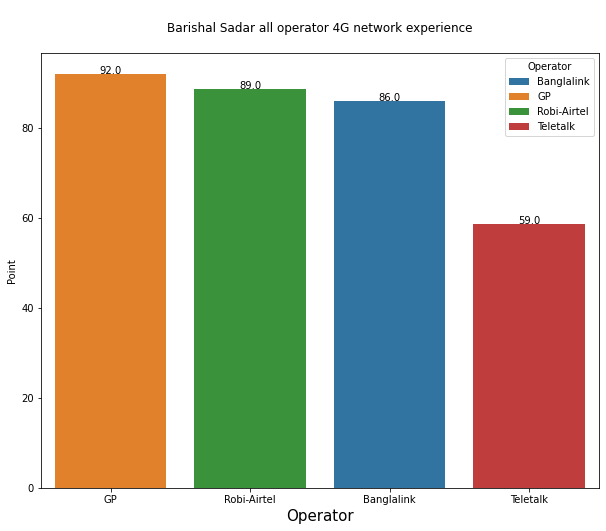

In [72]:
area = area_all_network_df['Upazila_or_Thana'].unique()
area[0]

network = area_all_network_df['Active_Network_Available'].unique()
network[0]

max_score = area_all_network_df[['Point']].max().unique()
max_score[0]


max_area_all_network_df = area_all_network_df[(area_all_network_df['Point'] == max_score[0])]
max_area_all_network_df

max_network = max_area_all_network_df['Operator'].unique()
max_network[0]


plt.figure(figsize=(10,8))
plt.title(f'\n{area[0]} all operator {network[0]} network experience\n')
ax = sns.barplot(x = 'Operator',y= 'Point', data= area_all_network_df, hue='Operator',order = area_all_network_df['Operator'].unique(), dodge = False, ci = None)
plt.xlabel('Operator',fontsize=15)
print(f"\nUpazila/Thana : {area[0]}\nAll Operator Network : {network[0]} networks")
print(f"Upazila/Thana : {area[0]} Best Coverage Network is : {max_network[0]}.")
for p in ax.patches:
        ax.annotate(p.get_height().round(), (p.get_x()+p.get_width()/2, p.get_height()+0.02), ha="center")
plt.show()

# **Predict Best Operator in your Upazila/Thana**

In [73]:
import math  

Op = ['GP', 'Robi-Airtel', 'Banglalink', 'Teletalk']
model_input = []
score = []

ele2 = input('\nYour Upazila/Thana Area (Add "Sadar" for Sadar Upazila, example : Barishal Sadar): ')
ele3 = input('Select Your Network Availability (4G or 3G/2G) : ')
ele4 = input('Your District : ')
ele5 = input('Your Upazila/Thana Zip Code : ')

for i in range(len(Op)):
  ele1 = Op[i]
  model_input.clear()
  #ele1 = input('Select Your Operator (GP / Robi-Airtel / Banglalink / Teletalk) : ') 
  model_input.append(ele1)
  model_input.append(ele2)
  model_input.append(ele3)
  model_input.append(ele4)
  model_input.append(ele5)
  #print(model_input)

  Operator = model_input[0]
  Upazila_or_Thana = model_input[1]
  Active_Network_Available	= model_input[2]
  District = model_input[3]
  Area_Zip_Code = model_input[4]

  
  
  p = model.predict(model_input)
  
  score.append(p)

  temp = p - math.floor(p)
 
  if (temp > 0.5):
    p = math.ceil(p)
  elif (temp == 0.5):
    p = p
  else:
    p = math.floor(p)

  print(f'Operator : {Operator} {Active_Network_Available} score in Area : {Upazila_or_Thana} (Out of 100) is : {round(p,2)}')  
#print(score)

#to convert lists to dictionary 
res = dict(zip(Op, score)) 
  
# Printing resultant dictionary  
#print ("Resultant dictionary is : " +  str(res))
mx = max(res, key=res.get)
print(f'\nBest Operator in Your Upazila/Thana is : {mx}')


print({'operator' : mx, 'score' : max(score)})


Your Upazila/Thana Area (Add "Sadar" for Sadar Upazila, example : Barishal Sadar): Barishal Sadar
Select Your Network Availability (4G or 3G/2G) : 4G
Your District : Barishal
Your Upazila/Thana Zip Code : 8200
Operator : GP 4G score in Area : Barishal Sadar (Out of 100) is : 95
Operator : Robi-Airtel 4G score in Area : Barishal Sadar (Out of 100) is : 87
Operator : Banglalink 4G score in Area : Barishal Sadar (Out of 100) is : 85
Operator : Teletalk 4G score in Area : Barishal Sadar (Out of 100) is : 55

Best Operator in Your Upazila/Thana is : GP
{'operator': 'GP', 'score': 94.5347862794079}


# **Building a Flask APP**

In [74]:
!pip install flask-sqlalchemy

In [75]:
!pip install flask-ngrok

In [76]:
!mkdir templates

mkdir: cannot create directory ‘templates’: File exists


In [ ]:
!mkdir static

In [77]:
%%writefile /content/static/css/style.css  


input[type=text], select{
  width: 50%;
  padding: 12px;
  border: 1px solid #ccc;
  border-radius: 4px;
  box-sizing: border-box;
  resize: vertical;
}



input[type=submit] {
  width: 50%;
  background-color: #04AA6D;
  color: white;
  padding: 12px 20px;
  border: none;
  border-radius: 4px;
  cursor: pointer;
  float: center;
}


form
{
    margin-left: auto;
    margin-right: auto;
    text-align: center;
}


h2
{
    margin-left: auto;
    margin-right: auto;
    text-align: center;
}

p
{
    margin-left: auto;
    margin-right: auto;
    text-align: center;
}


th
{
    margin-left: auto;
    margin-right: auto;
    text-align: center;
}

Overwriting /content/static/css/style.css


In [78]:
%%writefile /content/templates/index.html

<!DOCTYPE html>
<html>
<head>
<link rel = 'stylesheet' href = {{ url_for('static', filename = 'css/style.css') }}
</head>
<body>

<h2>Drop correct details here to find out your desired operator.</h2>

<form action="{{ url_for('prediction') }}" method='post'>
  <label for="Your Upazila/Thana Area (Add 'Sadar' for Sadar Upazila, example : Barishal Sadar): ">Location: Your Upazila/Thana Area (Add 'Sadar' for Sadar Upazila, example : Barishal Sadar)</label><br>
  <input type="text" id="location" name="location" value=""><br>

  <label for="Select Your Network Availability (4G or 3G/2G): ">Network Availability (4G or 3G/2G):</label><br>
  <input type="text" id="network_available" name="network_available" value=""><br><br>


  <label for="Your District: ">District:</label><br>
  <input type="text" id="district" name="district" value=""><br><br>

  <label for="Your Upazila/Thana Zip Code: ">Zip Code:</label><br>
  <input type="text" id="zip_code" name="zip_code" value=""><br><br>

  <input type="submit" value="Submit">
</form> 

<p>Click 'submit' to see the best operator of your area.</p>

{% block content %}
{% endblock %}

</body>
</html>

Overwriting /content/templates/index.html


In [79]:
%%writefile /content/templates/prediction.html

{% extends "index.html" %}

{% block content %}
<h2>Best operator of your area: </h2>

    {# Best operator in your area is: #}
    {% for key, value in prediction.items() %}
    <th><h2>{{ value }}</h2></th>
    <th><br></th>
    
    {% endfor %}

{% endblock %}

Overwriting /content/templates/prediction.html


In [80]:
!pip install catboost

In [81]:
#%%writefile app.py

import pickle
import math
import numpy as np
import pandas as pd
import catboost as cat
from catboost import CatBoostClassifier, CatBoostRegressor, Pool
from sklearn.metrics import mean_squared_error
from math import sqrt
from flask import Flask, escape, request, url_for, redirect, render_template, request
from flask_ngrok import run_with_ngrok

app = Flask(__name__)
run_with_ngrok(app)
model = pickle.load(open('/content/catboost_model.pkl', 'rb'))


@app.route('/', methods = ['GET', 'POST'])
def hello():
    return render_template('index.html')



@app.route('/prediction', methods = ['POST', 'GET'])
def prediction():
  Location = request.form['location']
  Network_Availability = request.form['network_available']
  District = request.form['district']
  Zip_Code = request.form['zip_code']


  Op = ['GP', 'Robi-Airtel', 'Banglalink', 'Teletalk']
  model_input = []
  score = []

  ele2 = Location
  ele3 = Network_Availability
  ele4 = District
  ele5 = Zip_Code


  for i in range(len(Op)):
    ele1 = Op[i]
    model_input.clear()
    #ele1 = input('Select Your Operator (GP / Robi-Airtel / Banglalink / Teletalk) : ') 
    model_input.append(ele1)
    model_input.append(ele2)
    model_input.append(ele3)
    model_input.append(ele4)
    model_input.append(ele5)
    #print(model_input)

    Operator = model_input[0]
    Upazila_or_Thana = model_input[1]
    Active_Network_Available	= model_input[2]
    District = model_input[3]
    Area_Zip_Code = model_input[4]      

    p = model.predict(model_input)
  
    score.append(p)

    temp = p - math.floor(p)

    if (temp > 0.5):
      p = math.ceil(p)
    elif (temp == 0.5):
      p = p
    else:
      p = math.floor(p)

    #print(f'Operator : {Operator} {Active_Network_Available} score in Area : {Upazila_or_Thana} (Out of 100) is : {round(p,2)}')  


  #to convert lists to dictionary 
  res = dict(zip(Op, score)) 
  
  # Printing resultant dictionary  
  #print ("Resultant dictionary is : " +  str(res))
  mx = max(res, key=res.get)
  #print(f'\nBest Operator in Your Upazila/Thana is : {mx}')

  max_in_dictionary = {'operator' : mx}            #'score' : max(score)}


  return render_template('prediction.html', prediction = max_in_dictionary) 

        
if __name__ == "__main__":
  app.run()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


 * Running on http://52d9-34-125-152-27.ngrok.io
 * Traffic stats available on http://127.0.0.1:4040


127.0.0.1 - - [17/Sep/2021 04:33:09] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [17/Sep/2021 04:33:10] "GET /static/css/style.css HTTP/1.1" 200 -
127.0.0.1 - - [17/Sep/2021 04:33:10] "GET /favicon.ico HTTP/1.1" 404 -
127.0.0.1 - - [17/Sep/2021 04:33:11] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [17/Sep/2021 04:33:14] "GET /static/css/style.css HTTP/1.1" 200 -
127.0.0.1 - - [17/Sep/2021 04:33:26] "POST /prediction HTTP/1.1" 200 -
127.0.0.1 - - [17/Sep/2021 04:33:27] "GET /prediction HTTP/1.1" 400 -
127.0.0.1 - - [17/Sep/2021 04:33:47] "POST /prediction HTTP/1.1" 200 -
127.0.0.1 - - [17/Sep/2021 04:33:58] "POST /prediction HTTP/1.1" 200 -


In [ ]:
!pip install gunicorn

     |████████████████████████████████| 79 kB 4.6 MB/s 


In [82]:
!pip install requests

In [83]:
import requests
import json 
# local url
url = 'https://coverage-checker.herokuapp.com/'

headers = {'Content-type': 'text/plain', 'Accept': 'text/plain'}
# sample data
data = {'location': 'Raozan', 'network_available': '4G', 'district': 'Chittagong', 'zip_code': '4340'}
#data = json.dumps(data)

send_request = requests.post(url, headers, data) #should get : Response 200

print(send_request.text) # should get predicted result

<!DOCTYPE html>
<html>
<head>
<link rel = 'stylesheet' href = /static/css/style.css
</head>
<body>

<h2>Drop correct details here to find out your desired operator.</h2>

<form action="/prediction" method='POST'>
  <label for="Your Upazila/Thana Area (Add 'Sadar' for Sadar Upazila, example : Barishal Sadar): ">Location: Your Upazila/Thana Area (Add 'Sadar' for Sadar Upazila, example : Barishal Sadar)</label><br>
  <input type="text" id="location" name="location" value=""><br>

  <label for="Select Your Network Availability (4G or 3G/2G): ">Network Availability (4G or 3G/2G):</label><br>
  <input type="text" id="network_available" name="network_available" value=""><br><br>


  <label for="Your District: ">District:</label><br>
  <input type="text" id="district" name="district" value=""><br><br>

  <label for="Your Upazila/Thana Zip Code: ">Zip Code:</label><br>
  <input type="text" id="zip_code" name="zip_code" value=""><br><br>

  <input type="submit" value="Submit">
</form>

<p>Click 

In [84]:
!curl -I https://coverage-checker.herokuapp.com/

HTTP/1.1 200 OK
Connection: keep-alive
Server: gunicorn/19.9.0
Date: Fri, 17 Sep 2021 04:35:24 GMT
Content-Type: text/html; charset=utf-8
Content-Length: 1071
Via: 1.1 vegur



# ****Find Predicted Individual Score for an Operator****

In [86]:
import math  

model_input = []

ele1 = input('\nSelect Your Operator (GP / Robi-Airtel / Banglalink / Teletalk) : ') 
ele2 = input('Your Upazila/Thana Area (Add "Sadar" for Sadar Upazila, example : Barishal Sadar): ')
ele3 = input('Select Your Network Availability (4G or 3G/2G) : ')
ele4 = input('Your District : ')
ele5 = input('Your Upazila/Thana Zip Code : ')

model_input.append(ele1)
model_input.append(ele2)
model_input.append(ele3)
model_input.append(ele4)
model_input.append(ele5)


Operator = model_input[0]
Upazila_or_Thana = model_input[1]
Active_Network_Available	= model_input[2]
District = model_input[3]
Area_Zip_Code = model_input[4]


p = model.predict(model_input)

temp = p - math.floor(p)

if (temp > 0.5):
  p = math.ceil(p)
elif (temp == 0.5):
  p = p
else:
  p = math.floor(p)

print(f'\nOperator : {Operator} {Active_Network_Available} score in Area : {Upazila_or_Thana} (Out of 100) is : {round(p,2)}')


Select Your Operator (GP / Robi-Airtel / Banglalink / Teletalk) : GP
Your Upazila/Thana Area (Add "Sadar" for Sadar Upazila, example : Barishal Sadar): Patenga
Select Your Network Availability (4G or 3G/2G) : 4G
Your District : Chittagong
Your Upazila/Thana Zip Code : 4218

Operator : GP 4G score in Area : Patenga (Out of 100) is : 71


In [87]:
model.predict(model_input)

71.02972489577652

# **Using Different Train and Test Set**

In [88]:
df = pd.read_csv("/content/Coverage.csv",header=0, delimiter=",")
df.head(3)

,Index,Upazila_or_Thana,District,Area_Zip_Code,Latitude,Longitude,Operator,Active_Network_Available,Network_Level,Satisfaction_Score,Real_Time_Experience
0,0,Kawkhali,Pirojpur,8510,22.626128,90.059278,GP,4G,Low,3,4.0
1,1,Mathbaria,Pirojpur,8560,22.287592,89.959272,GP,4G,Low,3,4.0
2,2,Nazirpur,Pirojpur,8540,22.729367,89.960880,GP,4G,Low,3,5.0


In [89]:
df_test = pd.read_csv("/content/Coverage_test.csv",header=0, delimiter=",")
df_test.head(3)

,Upazila_or_Thana,District,Area_Zip_Code,Latitude,Longitude,Operator,Active_Network_Available,Network_Level,Satisfaction_Score,Real_Time_Experience
0,Kawkhali,Pirojpur,8510,22.626128,90.059278,GP,4G,Low,3,4.0
1,Mathbaria,Pirojpur,8560,22.287592,89.959272,GP,4G,Low,3,3.0
2,Nazirpur,Pirojpur,8540,22.729367,89.960880,GP,4G,Low,3,3.0


In [90]:
df = df.drop(['Longitude', 'Latitude', 'Index'], axis=1)
df.head(3)

,Upazila_or_Thana,District,Area_Zip_Code,Operator,Active_Network_Available,Network_Level,Satisfaction_Score,Real_Time_Experience
0,Kawkhali,Pirojpur,8510,GP,4G,Low,3,4.0
1,Mathbaria,Pirojpur,8560,GP,4G,Low,3,4.0
2,Nazirpur,Pirojpur,8540,GP,4G,Low,3,5.0


In [91]:
df_test = df_test.drop(['Longitude', 'Latitude'], axis=1)
df_test.head(3)

,Upazila_or_Thana,District,Area_Zip_Code,Operator,Active_Network_Available,Network_Level,Satisfaction_Score,Real_Time_Experience
0,Kawkhali,Pirojpur,8510,GP,4G,Low,3,4.0
1,Mathbaria,Pirojpur,8560,GP,4G,Low,3,3.0
2,Nazirpur,Pirojpur,8540,GP,4G,Low,3,3.0


In [92]:
Point = df['Satisfaction_Score'] * (10/3) + df['Real_Time_Experience'] * (20/3)
df['Point'] = round(Point,2)
df['Point'] = df['Point'].astype(int)
#df['Real_Time_Experience'] = df['Real_Time_Experience'].astype(int)
df.head()

,Upazila_or_Thana,District,Area_Zip_Code,Operator,Active_Network_Available,Network_Level,Satisfaction_Score,Real_Time_Experience,Point
0,Kawkhali,Pirojpur,8510,GP,4G,Low,3,4.0,36
1,Mathbaria,Pirojpur,8560,GP,4G,Low,3,4.0,36
2,Nazirpur,Pirojpur,8540,GP,4G,Low,3,5.0,43
3,Nesarabad,Pirojpur,8522,GP,4G,Moderate,6,6.0,60
4,Pirojpur Sadar,Pirojpur,8500,GP,4G,Good,10,7.5,83


In [93]:
Point = df_test['Satisfaction_Score'] * (10/3) + df_test['Real_Time_Experience'] * (20/3)
df_test['Point'] = round(Point,2)
df_test['Point'] = df_test['Point'].astype(int)
#df['Real_Time_Experience'] = df['Real_Time_Experience'].astype(int)
df_test.head()

,Upazila_or_Thana,District,Area_Zip_Code,Operator,Active_Network_Available,Network_Level,Satisfaction_Score,Real_Time_Experience,Point
0,Kawkhali,Pirojpur,8510,GP,4G,Low,3,4.0,36
1,Mathbaria,Pirojpur,8560,GP,4G,Low,3,3.0,30
2,Nazirpur,Pirojpur,8540,GP,4G,Low,3,3.0,30
3,Nesarabad,Pirojpur,8522,GP,4G,Moderate,6,7.0,66
4,Pirojpur Sadar,Pirojpur,8500,GP,4G,Good,10,8.0,86


In [94]:
for col in ['Upazila_or_Thana','Operator', 'Active_Network_Available', 'District', 'Network_Level', 'Area_Zip_Code']:
    df[col] = df[col].astype('category')

In [95]:
df.dtypes

Upazila_or_Thana            category
District                    category
Area_Zip_Code               category
Operator                    category
Active_Network_Available    category
Network_Level               category
Satisfaction_Score             int64
Real_Time_Experience         float64
Point                          int64
dtype: object

In [96]:
for col in ['Upazila_or_Thana','Operator', 'Active_Network_Available', 'District', 'Network_Level', 'Area_Zip_Code']:
    df_test[col] = df_test[col].astype('category')

In [97]:
df_test.dtypes

Upazila_or_Thana            category
District                    category
Area_Zip_Code               category
Operator                    category
Active_Network_Available    category
Network_Level               category
Satisfaction_Score             int64
Real_Time_Experience         float64
Point                          int64
dtype: object

In [98]:
train = df
test = df_test

In [99]:
train.shape, test.shape

((22360, 9), (4472, 9))

In [100]:
import catboost as cat
cat_feat = ['Upazila_or_Thana','Operator', 'Active_Network_Available', 'District' , 'Area_Zip_Code']
#features = list(set(train.columns)-set(['Point']))
features = ['Operator','Upazila_or_Thana', 'Active_Network_Available', 'District', 'Area_Zip_Code']
target = 'Point'
model = cat.CatBoostRegressor(random_state= 0, cat_features=cat_feat, verbose=0, learning_rate = 0.1, iterations= 335, l2_leaf_reg= 3, loss_function = 'RMSE', depth = 10)
#model.fit(train[features],train[target])

In [101]:
model.fit(train[features],train[target])

In [102]:
importances = model.get_feature_importance(prettified=True)
print(importances)

                 Feature Id  Importances
0                  Operator    34.159897
1                  District    21.474059
2          Upazila_or_Thana    19.456553
3  Active_Network_Available    18.553311
4             Area_Zip_Code     6.356179


In [103]:
y_true= pd.DataFrame(data=test[target], columns=['Point'])
test_temp = test.drop(columns=[target])

In [104]:
data=test[target]
data

0       36
1       30
2       30
3       66
4       86
        ..
4467    66
4468    63
4469    36
4470    60
4471    60
Name: Point, Length: 4472, dtype: int64

In [105]:
y_pred = model.predict(test_temp[features])

In [106]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse = sqrt(mean_squared_error(y_true, y_pred))
print(rmse)

7.910929404824637


In [107]:
model.predict(test_temp[features].head(10))

array([33.66667581, 30.63573654, 32.6183462 , 45.78558755, 65.7850528 ,
       35.90850926, 70.32681185, 65.59943174, 90.76093306, 59.17536849])

In [ ]:
train_score = model.score(train[features],train[target])
train_score

In [109]:
val_score = model.score(test[features],test[target])
val_score

0.9087669492592082

In [110]:
import math  

Op = ['GP', 'Robi-Airtel', 'Banglalink', 'Teletalk']
model_input = []
score = []

ele2 = input('\nYour Upazila/Thana Area (Add "Sadar" for Sadar Upazila, example : Barishal Sadar): ')
ele3 = input('Select Your Network Availability (4G or 3G/2G) : ')
ele4 = input('Your District : ')
ele5 = input('Your Upazila/Thana Zip Code : ')

for i in range(len(Op)):
  ele1 = Op[i]
  model_input.clear()
  #ele1 = input('Select Your Operator (GP / Robi-Airtel / Banglalink / Teletalk) : ') 
  model_input.append(ele1)
  model_input.append(ele2)
  model_input.append(ele3)
  model_input.append(ele4)
  model_input.append(ele5)
  #print(model_input)

  Operator = model_input[0]
  Upazila_or_Thana = model_input[1]
  Active_Network_Available	= model_input[2]
  District = model_input[3]
  Area_Zip_Code = model_input[4]

  
  
  p = model.predict(model_input)
  
  score.append(p)

  temp = p - math.floor(p)
 
  if (temp > 0.5):
    p = math.ceil(p)
  elif (temp == 0.5):
    p = p
  else:
    p = math.floor(p)

  print(f'Operator : {Operator} {Active_Network_Available} score in Area : {Upazila_or_Thana} (Out of 100) is : {round(p,2)}')  
#print(score)

#to convert lists to dictionary 
res = dict(zip(Op, score)) 
  
# Printing resultant dictionary  
#print ("Resultant dictionary is : " +  str(res))
mx = max(res, key=res.get)
print(f'\nBest Operator in Your Area is : {mx}')


Your Upazila/Thana Area (Add "Sadar" for Sadar Upazila, example : Barishal Sadar): Patenga
Select Your Network Availability (4G or 3G/2G) : 4G
Your District : Chittagong
Your Upazila/Thana Zip Code : 4218
Operator : GP 4G score in Area : Patenga (Out of 100) is : 89
Operator : Robi-Airtel 4G score in Area : Patenga (Out of 100) is : 95
Operator : Banglalink 4G score in Area : Patenga (Out of 100) is : 84
Operator : Teletalk 4G score in Area : Patenga (Out of 100) is : 79

Best Operator in Your Area is : Robi-Airtel
